# CONFROTO VALORE DI $\lambda$

Nei punti *frequenza_lambda*, _fabris perot_(1), _doppia fenditura_(2) sono stati stimati valori di $\lambda$ e di $\sigma_\lambda$.
Ora verifichiamo la compatibilità dei valori:

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys
import scipy.stats as sc

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')
from giopy import final_val
from interpolazione import probability_under_norm

dir_path = os.path.abspath('')
FILE = dir_path + '/output_completo.csv'
fr = pd.read_csv(FILE)

In [3]:
λall = np.array([np.float64(fr['λ']),np.float64(fr['λ2']),np.float64(fr['λ3'])])
σλ = np.array([np.float64(fr['σλ']),np.float64(fr['σλ2']),np.float64(fr['σλ3'])])

w = 1/σλ**2

λm = np.average(λall, weights=w)
σλm = np.sqrt(1/np.sum(w))

t = np.abs(λall - λm)/np.sqrt(σλ**2 + σλm**2)
pvalue = np.array([1-probability_under_norm(0,1,i) for i in t])

print(λall)
print(σλ)
print(t)
print(pvalue)
print(λm, σλm)

[0.0281875  0.02825922 0.02826667]
[1.04395582e-03 7.14554994e-05 2.04830553e-03]
[0.06823296 0.00322127 0.00379049]
[0.944 1.    1.   ]
0.028258897881040135 7.124556487296032e-05


7.145549939610104e-05


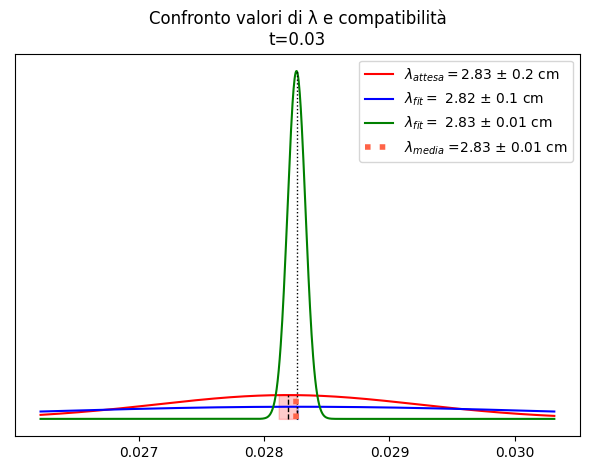

In [4]:
λ, λf, λfpm = λall
sigmaλ, sigmaλf, sigmaλfpm = σλ
print(sigmaλf)


m,M = np.min([λ-1*sigmaλ,λfpm-1*sigmaλfpm, λf -1*sigmaλf]),np.max([λ+1*sigmaλ,λfpm+1*sigmaλfpm,λf+sigmaλf*1])
x = np.linspace(m,M,1000)

# λ fabris perot:  (2.827 ± 0.205)e-2 m
# λ precedente:  (2.819 ± 0.104)e-2 m
# λmedia:  2.82e-2 m

λfp = final_val(λfpm*100,sigmaλfpm*100,2,0,'cm') # fabris perot
λampezzadistanza = final_val(λ*100,sigmaλ*100,2,0,'cm') # distanza
λftext = final_val(λf*100,sigmaλf*100,2,0,'cm') # fenditura
λmedia = final_val(λm*100,σλm*100,2,0,'cm') # media

################################ distanza ################################
n1 = sc.norm.pdf(x,loc=λ,scale=sigmaλ)
plt.plot(x,n1, color='red', label='$λ_{attesa} =$' + λfp)
t = np.abs(λ - λm) / np.sqrt(sigmaλ**2 + σλm**2)
plt.fill_between(x= x,y1= n1,where= (λ- t*sigmaλ < x)&(x < λ + t*sigmaλ),color= "red",alpha= 0.2)
plt.vlines(x=λ,ymin=0,ymax=max(n1),linewidths=1.0,label="", color='black',linestyle="--")

################################ fabris perot ################################
n2 = sc.norm.pdf(x,loc=λfpm,scale=sigmaλfpm)
plt.plot(x,n2, color='blue', label='$λ_{fit} =$ '+ λampezzadistanza)
t = np.abs(λfpm - λm) / np.sqrt(sigmaλfpm**2 + σλm**2)
plt.fill_between(x= x,y1= n2,where= (λfpm- t*sigmaλfpm < x)&(x < λfpm + t*sigmaλfpm),color= "blue",alpha= 0.2)
plt.vlines(x=λfpm,ymin=0,ymax=max(n2),linewidths=1.0,label="", color='black',linestyle="-.")

###################\############## fenditura ################################
n3 = sc.norm.pdf(x,loc=λf,scale=sigmaλf)
plt.plot(x,n3, color='green', label='$λ_{fit} =$ '+ λftext)
t = np.abs(λf - λm) / np.sqrt(sigmaλf**2 + σλm**2)
plt.fill_between(x= x,y1= n3,where= (λf- t*sigmaλf < x)&(x < λf + t*sigmaλf),color= "green",alpha= 0.2)
plt.vlines(x=λf,ymin=0,ymax=max(n3),linewidths=1.0,label="", color='black',linestyle=":")

################################ media ################################
plt.vlines(x=λm,ymax=max(n1),ymin=0,linewidths=4.0,label="$λ_{media}$ =" + λmedia, color='#FF6347',linestyle="dotted")

#plt.ylim(0,0.00005)
# plt.xticks()
# plt.xlim(0.02824,0.02826)
# plt.yscale('log')
plt.title('Confronto valori di λ e compatibilità\nt=0.03')
plt.tight_layout()
plt.yticks([])
plt.legend()
plt.show()